In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import data
data = pd.read_csv("../data/Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
# Drop unnecessary data
X = data.drop(["Exited","RowNumber","CustomerId","Surname"],axis=1)
y = data["Exited"]

In [4]:
# LabelEncoder
X["Gender"] = X["Gender"].map({"Female":0,"Male":1})

In [5]:
# OneHotEncoder data
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_cols = ["Geography"]
transformer = ColumnTransformer(transformers=[("OneHot",OneHotEncoder(),categorical_cols)],remainder="passthrough")
X = transformer.fit_transform(X)

In [6]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
# Standardize data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Building ANN
ann = tf.keras.models.Sequential() # Initializing the ANN model
ann.add(tf.keras.layers.Dense(units=6,activation="relu")) # Adding the first layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu")) # Adding the second layer
ann.add(tf.keras.layers.Dense(units=1,activation="relu")) # Adding the output layer
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"]) # Compile the ANN model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=3)
r = ann.fit(X_train,y_train,batch_size=32,epochs=100,callbacks=[early_stopping]) # Train the ANN model

Epoch 1/100
250/250 [==============================] - 1s 753us/step - loss: 1.7365 - accuracy: 0.7960
Epoch 2/100
250/250 [==============================] - 0s 691us/step - loss: 0.7824 - accuracy: 0.7952
Epoch 3/100
250/250 [==============================] - 0s 629us/step - loss: 0.5834 - accuracy: 0.7954
Epoch 4/100
250/250 [==============================] - 0s 591us/step - loss: 0.5374 - accuracy: 0.7968
Epoch 5/100
250/250 [==============================] - 0s 633us/step - loss: 0.5179 - accuracy: 0.7983
Epoch 6/100
250/250 [==============================] - 0s 635us/step - loss: 0.5051 - accuracy: 0.7980
Epoch 7/100
250/250 [==============================] - 0s 641us/step - loss: 0.4970 - accuracy: 0.7980
Epoch 8/100
250/250 [==============================] - 0s 597us/step - loss: 0.4934 - accuracy: 0.7972


KeyError: 'val_accuracy'

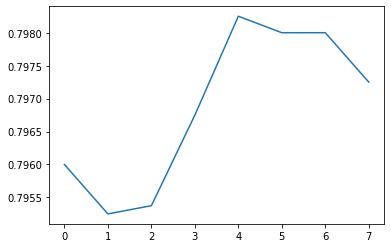

In [13]:
plt.plot(r.history['accuracy'],label='loss')
plt.plot(r.history['val_accuracy'],label='val_loss')
plt.legend();

**Use our ANN model to predict if the customer with the following informations will leave the bank:**

Geography: France == 1,0,0

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: $ 60000

Number of Products: 2

Does this customer have a credit card? Yes

Is this customer an Active Member: Yes

Estimated Salary: $ 50000

So, should we say goodbye to that customer?

In [9]:
# Making prediction on trained ANN model
ann.predict(scaler.transform([[1,0,0,600,1,40,3,60000,2,1,1,50000]]))>0.5

array([[False]])

Therefore, our ANN model predicts that this customer stays in the bank!

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

**Important note 2:** Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.

**Important note 3:** If you're dealing with non-binary classificatiom, loss = "categorical_crossentropy", activation = "softmax"

In [10]:
# Checking accuracy on trained ANN model
ann_preds = ann.predict(X_test)

In [11]:
y_test_show = np.array(y_test).reshape(-1,1)

In [12]:
ann_preds_show = np.array(ann_preds).reshape(-1,1)

In [13]:
ann_preds = ann.predict(X_test)> 0.5
show = np.concatenate((ann_preds.reshape(-1,1), np.array(y_test).reshape(-1,1)),1)

In [14]:
df = pd.DataFrame(show,columns=["Predicted","Real"])
df

,Predicted,Real
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
1995,0,0
1996,0,0
1997,0,0
1998,0,0


In [15]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,ann_preds)

array([[1512,   83],
       [ 204,  201]])

In [16]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,ann_preds)

0.8565

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_preds = rf.predict(X_test)
rf.score(X_test,y_test)

0.8665

In [18]:
from sklearn.metrics import confusion_matrix

confusion_matrix(rf_preds,ann_preds)

array([[1659,   59],
       [  57,  225]])

In [19]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train,y_train)
log_preds = rf.predict(X_test)
log.score(X_test,y_test)

0.811